# ⚙️ Agentic AI for Science (AAI4Science) Hackathon 2025



This notebook demonstrates the workflow for using the AtomGPT (https://atomgpt.org) API and
agentic AI functionalities to create, test, and run simple agentic tasks in the context of
the AAI4Science (Agentic AI for Science) Hackathon 2025.

The example shows:
1. How to install and configure dependencies.
2. How to initialize AGAPI and OpenAI-compatible clients.
3. How to perform simple API-based interactions.
4. How to define and run function tools and asynchronous agents.

Author: Prof. Kamal Choudhary (kchoudh2@jhu.edu)

Reference: https://doi.org/10.1007/s40192-025-00410-9

Event: https://www.eventbrite.com/e/agentic-ai-for-science-aai4science-hackathon-2025-tickets-1797906650189






Installs the required Python packages:
- `openai-agents`: Provides Agentic AI abstraction tools (Agent, Runner, function_tool).
- `agapi`: AtomGPT API client for connecting to the AtomGPT.org endpoint.

This ensures all modules required for subsequent agentic operations are available.

In [ ]:
!uv pip install openai-agents agapi

Using Python 3.12.12 environment at: /usr
Resolved 42 packages in 858ms
Prepared 8 packages in 456ms
Uninstalled 3 packages in 65ms
Installed 8 packages in 49ms
 + agapi==2025.9.15
 + colorama==0.4.6
 + griffe==1.14.0
 - openai==1.109.1
 + openai==2.7.1
 + openai-agents==0.5.0
 - pydantic==2.11.10
 + pydantic==2.12.4
 - pydantic-core==2.33.2
 + pydantic-core==2.41.5
 + types-requests==2.32.4.20250913


Instructions:

1. Visit https://atomgpt.org/
2. Navigate to: Profile → Settings → Account → API Keys
3. Create or view your API key (looks like 'sk-xxxxxxxxx').
4. Paste the key below in the variable `api_key`.

⚠️ Note: For security, do not share or hardcode your real API key in public repositories.

In [ ]:
api_key="sk-"

Demonstrates using the AGAPI client to query the AtomGPT API directly.

Steps:
1. Initialize the `Agapi` client with the provided API key.
2. Send a simple query ("What’s the capital of US") to test the connection.
3. Print the response returned by the AtomGPT system.

Expected Output:
"The capital of US is Washington, D.C."

In [ ]:
from agapi.client import Agapi
client = Agapi(api_key=api_key)
r = client.ask("Whats the capital of US")
print(r)


The capital of the United States is **Washington, D.C.**


# ⚙️ Agentic AI with Function Tool Example


This section introduces the concept of an agentic workflow using OpenAI-compatible Agents.

Modules used:
- `AsyncOpenAI`: Async API client for concurrent operations.
- `function_tool`: Decorator for defining callable tools.
- `Agent`, `Runner`, `OpenAIChatCompletionsModel`: Core classes for defining, configuring, and executing AI agents.
- `set_tracing_disabled`: Disables tracing for cleaner execution during demos.

Key Steps:
1. Define an asynchronous OpenAI client using AtomGPT API.
2. Create a function tool (`get_weather`) that simulates retrieving weather data.
3. Define an agent with instructions, model, and tool integration.
4. Run the agent asynchronously using the `Runner.run()` method.

Expected Behavior:
The agent uses the tool automatically when the user asks for weather, returning a formatted response.


In [ ]:
from openai import OpenAI

model_name="deepseek-ai/deepseek-v3.1"
model_name="google/gemma-3-27b-it"
model_name="moonshotai/kimi-k2-instruct-0905"
model_name="meta/llama-3.2-90b-vision-instruct"
model_name="meta/llama-4-maverick-17b-128e-instruct"
model_name = "openai/gpt-oss-20b"
model_name="openai/gpt-oss-120b"
model_name="qwen/qwen3-next-80b-a3b-instruct"

model_name = "openai/gpt-oss-20b"
client = OpenAI(
    base_url="https://atomgpt.org/api",
    api_key=api_key
)

result = client.chat.completions.create(
    model=model_name,
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "Whats the capital of US?"}
    ],
    reasoning_effort="high"
)

print(result.choices[0].message.content)



The capital of the United States is **Washington, D.C.**


In [ ]:
from openai import AsyncOpenAI
from agents import function_tool, Agent, OpenAIChatCompletionsModel
from agents import set_tracing_disabled, Runner, ModelSettings

set_tracing_disabled(disabled=True)

client = AsyncOpenAI(
    base_url="https://atomgpt.org/api",
    api_key=api_key
)

# -----------------------------
# 🌤️ Function Tool Definition
# -----------------------------
"""
Defines a callable function tool that the AI agent can use to retrieve weather information.

Parameters:
- city (str): The name of the city for which weather is requested.

Returns:
- str: A formatted string describing the current weather conditions.

The decorator `@function_tool` registers the function so that the agent can decide to call it automatically
when the query requires it (e.g., “What’s the weather in New York City?”).
"""

@function_tool
def get_weather(city: str) -> str:
    """Get the current weather for a city."""
    print(f"getting weather for {city}")
    return f"The weather in {city} is sunny. Temperature: 62°F. Humidity: 45%."


# -----------------------------
# 🧠 Agent Initialization
# -----------------------------
"""
Creates an Agent named “Assistant” with custom behavior and attached tools.

Parameters:
- name (str): Agent’s name for identification.
- instructions (str): Contextual behavior instructions for the model.
- model (OpenAIChatCompletionsModel): Backend model for text generation.
- tools (list): List of callable tools available to the agent (e.g., get_weather).

Optional:
ModelSettings can be used to control tool invocation mode, reasoning depth, etc.
"""

agent = Agent(
    name="Assistant",
    instructions="You're a helpful assistant. You respond in a format that is useful for Enterprise Executives.",
    model=OpenAIChatCompletionsModel(
        model="openai/gpt-oss-20b",
        openai_client=client
    ),
    # model_settings=ModelSettings(
    #     tool_choice="auto",
    # ),
    tools=[get_weather],
)

# -----------------------------
# 🚀 Run the Agent
# -----------------------------
"""
Runs the agent asynchronously using the Runner utility.

Query:
- "What's the weather in New York City?"

Expected Flow:
1. The model identifies that the `get_weather` tool can be used.
2. The tool executes, returning the weather string.
3. The final output is printed as the agent’s response.

Expected Output:
"The weather in New York City is sunny. Temperature: 62°F. Humidity: 45%."
"""

result = await Runner.run(agent, "What's the weather in New York City?")
print(result.final_output)

[debug] getting weather for New York City
**New York City – Weather Snapshot**

- ☀️ **Condition:** Sunny  
- 🌡️ **Temperature:** 62 °F (≈ 16.7 °C)  
- 💧 **Humidity:** 45%  

*Prepared for quick reference.*


# Task 1: Make a tool calling to get current weather in Baltimore modifying the scipt/function above and using the function such as https://atomgpt.org/weather?location=Baltimore&APIKEY=sk-XYZ

In [ ]:
import os
import time
import json
import urllib.parse as _url
from functools import lru_cache
from typing import Dict, Any

import requests
from openai import AsyncOpenAI
from agents import function_tool, Agent, OpenAIChatCompletionsModel
from agents import Runner, ModelSettings, set_tracing_disabled

# Respect your existing config/seed from earlier cells.
set_tracing_disabled(disabled=True)

# Prefer env var; fall back to previously-defined api_key (from your notebook).
_ATOMGPT_API_KEY = os.getenv("ATOMGPT_API_KEY", globals().get("api_key", ""))

# Constants for clarity & reuse
_WEATHER_ENDPOINT = "https://atomgpt.org/weather"
_REQ_TIMEOUT_S   = 10
_MAX_RETRIES     = 2
_RETRY_BACKOFF_S = 1.5

def _build_weather_url(city: str) -> str:
    """Construct a safe weather URL for AtomGPT."""
    q = {
        "location": city.strip(),
        "APIKEY": _ATOMGPT_API_KEY,
    }
    return f"{_WEATHER_ENDPOINT}?{_url.urlencode(q)}"

def _extract_weather_fields(payload: Dict[str, Any]) -> Dict[str, Any]:
    """
    Normalize possible response shapes to a small, consistent schema.
    Expected primary keys: weather, temperature, humidity.
    Falls back to common alternates if the API shape changes.
    """
    if not isinstance(payload, dict):
        return {"weather": "N/A", "temperature": "N/A", "humidity": "N/A"}

    # primary (documented) keys
    weather = payload.get("weather")
    temp    = payload.get("temperature")
    humid   = payload.get("humidity")

    # common alternates (defensive)
    if weather is None:
        weather = payload.get("condition") or payload.get("status")
    if temp is None:
        temp = payload.get("temp") or payload.get("temperature_c") or payload.get("temperature_f")
    if humid is None:
        humid = payload.get("hum") or payload.get("relative_humidity")

    return {
        "weather": weather if weather is not None else "N/A",
        "temperature": temp if temp is not None else "N/A",
        "humidity": humid if humid is not None else "N/A",
    }

@lru_cache(maxsize=128)
def _cached_call(url: str) -> Dict[str, Any]:
    """
    Lightweight memoization layer so repeated notebook runs in quick succession
    don't spam the endpoint. Cache key is the full URL.
    """
    # Simple bounded retry with exponential backoff
    last_err = None
    for attempt in range(1, _MAX_RETRIES + 2):
        try:
            resp = requests.get(url, timeout=_REQ_TIMEOUT_S)
            resp.raise_for_status()
            try:
                return resp.json()
            except json.JSONDecodeError:
                # Try a tolerant parse if server returns text/json-ish
                return {"raw": resp.text}
        except Exception as e:
            last_err = e
            if attempt <= _MAX_RETRIES:
                sleep_s = _RETRY_BACKOFF_S ** attempt
                print(f"[WARN] Weather fetch failed (attempt {attempt}/{_MAX_RETRIES+1}); "
                      f"retrying in {sleep_s:.1f}s…")
                time.sleep(sleep_s)
            else:
                raise last_err

@function_tool
def get_weather(city: str = "Baltimore") -> str:
    """
    Fetch the current weather for a city via AtomGPT's weather endpoint.

    Args:
        city: City name (case-insensitive). Defaults to "Baltimore".

    Returns:
        A concise, human-readable weather report (str).

    Notes:
    - Robust to small API schema shifts.
    - Retries transient failures with exponential backoff.
    - Memoized for a short-lived notebook session to reduce duplicate calls.

    Example:
        get_weather("Baltimore")
    """
    if not _ATOMGPT_API_KEY:
        return "[error] Missing API key. Set ATOMGPT_API_KEY env var or define `api_key` earlier."

    city_norm = " ".join(city.split())  # collapse extra whitespace
    url = _build_weather_url(city_norm)
    print(f"Fetching weather for '{city_norm}' via: {url}")

    try:
        payload = _cached_call(url)
        fields = _extract_weather_fields(payload)
        # Friendly, consistent formatting (units are whatever the API returns)
        return (
            f"Weather report for {city_norm}\n"
            f"• Condition   : {fields['weather']}\n"
            f"• Temperature : {fields['temperature']}\n"
            f"• Humidity    : {fields['humidity']}"
        )
    except Exception as e:
        return f"[error] Failed to get weather for '{city_norm}': {type(e).__name__}: {e}"

# Ensure a client exists in this continuous notebook session
try:
    client
except NameError:
    client = AsyncOpenAI(base_url="https://atomgpt.org/api", api_key=_ATOMGPT_API_KEY or "sk-")

# Define an agent that prefers tool use when appropriate
agent = Agent(
    name="Assistant",
    instructions=(
        "You are a precise assistant. When asked about weather, call the tool and return "
        "a short, bullet-style report (condition, temperature, humidity). If the tool fails, "
        "report the error succinctly."
    ),
    model=OpenAIChatCompletionsModel(
        model="openai/gpt-oss-20b",
        openai_client=client,
    ),
    model_settings=ModelSettings(tool_choice="auto"),
    tools=[get_weather],
)

# Demo run
result = await Runner.run(agent, "What's the current weather in Baltimore?")
print(result.final_output)

Fetching weather for 'Baltimore' via: https://atomgpt.org/weather?location=Baltimore&APIKEY=sk-d636d70f2cd7423e934d900e3800479f
**Baltimore Weather Report**

- Condition: Few clouds  
- Temperature: 59.34 °F  
- Humidity: 30%


Develop python code below

# Task 2: Make a tool calling to get total number of materials in the JARVIS-DFT database using the function such as https://atomgpt.org/jarvis_dft/query?elements="Si,C"&APIKEY=sk-XYZ

In [ ]:
# --- Task 2: JARVIS-DFT count tool (no redundant helpers) ---------------------
from agents import function_tool, Agent, OpenAIChatCompletionsModel
from agents import Runner, ModelSettings
import urllib.parse as _url

JARVIS_QUERY_ENDPOINT = "https://atomgpt.org/jarvis_dft/query"

@function_tool
def count_jarvis_materials(elements: str = "Si,C") -> str:
    """
    Return the total number of JARVIS-DFT materials that contain the given comma-separated elements.
    Example:
        elements="Si,C" -> calls:
        https://atomgpt.org/jarvis_dft/query?elements="Si,C"&APIKEY=...
    """
    if not (_ATOMGPT_API_KEY or globals().get("api_key", "")):
        return "[error] Missing API key. Set ATOMGPT_API_KEY or define `api_key` earlier."

    # API expects the elements value wrapped in double quotes per prompt spec
    params = {"elements": f"\"{elements}\"", "APIKEY": _ATOMGPT_API_KEY or api_key}
    url = f"{JARVIS_QUERY_ENDPOINT}?{_url.urlencode(params)}"
    print(f"JARVIS query URL: {url}")

    try:
        payload = _cached_call(url)  # reuses the memoized fetch from Task 1
        total = payload.get("total")
        returned = payload.get("returned")
        results = payload.get("results") or []

        if total is None:
            return "[error] Unexpected response format: missing 'total'."

        sample_ids = []
        for item in results[:3]:
            jid = item.get("jid") or item.get("id")
            if jid:
                sample_ids.append(jid)

        msg = f"JARVIS-DFT materials containing [{elements}]: {total}"
        if returned is not None:
            msg += f" (returned this page: {returned})"
        if sample_ids:
            msg += f"\nExamples: {', '.join(sample_ids)}"
        return msg

    except Exception as e:
        return f"[error] JARVIS-DFT query failed for [{elements}]: {type(e).__name__}: {e}"

# Minimal agent wiring (reuses existing `client`)
jarvis_agent = Agent(
    name="Assistant",
    instructions="Answer with the total count; include a few example IDs if available.",
    model=OpenAIChatCompletionsModel(model="openai/gpt-oss-20b", openai_client=client),
    model_settings=ModelSettings(tool_choice="auto", temperature=0.0, seed=SEED),
    tools=[count_jarvis_materials],
)

# Demo
query = "How many JARVIS-DFT materials contain both Si and C? Use elements string Si,C."
result = await Runner.run(jarvis_agent, query)
print(result.final_output)

JARVIS query URL: https://atomgpt.org/jarvis_dft/query?elements=%22Si%2CC%22&APIKEY=sk-d636d70f2cd7423e934d900e3800479f
There are **19** JARVIS‑DFT materials that contain both silicon (Si) and carbon (C).  
A few example material IDs are:

- **JVASP‑22644**  
- **JVASP‑107**  
- **JVASP‑96830**


# Task 3: Make a tool calling to latest 10 papers on chemical compound MgB2 from arXiv repository using the function such as https://atomgpt.org/arxiv?query=MgB2&APIKEY=sk-XYZ

In [ ]:
# --- Task 3: arXiv latest 10 for a query (defaults to MgB2) -------------------
from agents import function_tool, Agent, OpenAIChatCompletionsModel
from agents import Runner, ModelSettings
import urllib.parse as _url

ARXIV_ENDPOINT = "https://atomgpt.org/arxiv"

@function_tool
def get_arxiv_papers(query: str = "MgB2", limit: int = 10) -> str:
    """
    Fetch the latest `limit` arXiv papers for `query` via AtomGPT arXiv endpoint.

    Example:
        get_arxiv_papers("MgB2", limit=10)
        -> calls https://atomgpt.org/arxiv?query=MgB2&APIKEY=...
    """
    if not (_ATOMGPT_API_KEY or globals().get("api_key", "")):
        return "[error] Missing API key. Set ATOMGPT_API_KEY or define `api_key` earlier."

    params = {"query": query, "APIKEY": _ATOMGPT_API_KEY or api_key}
    url = f"{ARXIV_ENDPOINT}?{_url.urlencode(params)}"
    print(f"arXiv query URL: {url}")

    try:
        data = _cached_call(url)  # reuse memoized fetch from Task 1
        results = data.get("results") or []
        total = data.get("count", len(results))

        if not results:
            return f"No arXiv results found for '{query}'."

        n = min(limit, len(results))
        lines = [f"📚 Latest {n} arXiv papers on '{query}' (total found: {total})\n"]
        for i, p in enumerate(results[:n], start=1):
            title = (p.get("title") or "N/A").strip()
            authors = p.get("authors")
            if isinstance(authors, list):
                authors = ", ".join(authors)
            authors = authors or "Unknown"
            published = p.get("published") or "Unknown date"
            link = p.get("id") or p.get("link") or "No link"
            lines.append(f"{i}. {title}\n   🧑‍🔬 {authors}\n   📅 {published}\n   🔗 {link}\n")
        return "\n".join(lines)

    except Exception as e:
        return f"[error] arXiv query failed for '{query}': {type(e).__name__}: {e}"

# Minimal agent wiring (reuses existing `client`)
arxiv_agent = Agent(
    name="Assistant",
    instructions="Return the latest 10 papers in a short, bullet-style list with title, authors, date, and link.",
    model=OpenAIChatCompletionsModel(model="openai/gpt-oss-20b", openai_client=client),
    model_settings=ModelSettings(tool_choice="auto", temperature=0.0, seed=SEED),
    tools=[get_arxiv_papers],
)

# Demo
result = await Runner.run(arxiv_agent, "Find the latest 10 arXiv papers about MgB2.")
print(result.final_output)

arXiv query URL: https://atomgpt.org/arxiv?query=MgB2&APIKEY=sk-d636d70f2cd7423e934d900e3800479f
- **Ambient‑pressure superconductivity above 22 K in hole‑doped YB₂**  
  *Xuejie Li, Wenbo Zhao, Yuzhou Hao, Xiaoying Wang, Zhibin Gao, Xiangdong Ding*  
  2025‑09‑25 | [arXiv:2509.20742v1](http://arxiv.org/abs/2509.20742v1)

- **Type‑1.5 SNSPD: Interacting vortex theory of two‑band‑gap superconducting single‑photon detectors**  
  *Leif Bauer, Daien He, Sathwik Bharadwaj, Shunshun Liu, Prasanna V. Balachandran, Zubin Jacob*  
  2025‑07‑01 | [arXiv:2507.01240v1](http://arxiv.org/abs/2507.01240v1)

- **Establishment of global phase coherence in a highly disordered fractal MgO/MgB₂ nanocomposite: Roles of interface, morphology and defect**  
  *Iku Nakaaki, Aoi Hashimoto, Shun Kondo, Yuichi Ikuhara, Shuuichi Ooi, Minoru Tachiki, Shunichi Arisawa, Akiko Nakamura, Taku Moronaga, Jun Chen, Hiroyo Segawa, Takahiro Sakurai, Hitoshi Ohta, Takashi Uchino*  
  2025‑06‑30 | [arXiv:2506.23616v1](http:

# Use chatgpt.com/claude.ai/gemini etc. to solve the following math problems.

# Task 4: There are exactly three positive real numbers $k$ such that the function
$$f(x) = \frac{(x - 18)(x - 72)(x - 98)(x - k)}{x}$$
defined over the positive real numbers achieves its minimum value at exactly two positive real numbers $x$. Find the sum of these three values of $k$. (Using any chatbot such as chatgpt.com, claude.ai etc. that you like.

# Task 4
Using the prompt I have, I have successfully taught Gemini, Chatgpt, and Claude to solve the issue:
https://gemini.google.com/share/8e072b5343e6

https://chatgpt.com/share/690cf416-9b48-8012-9c79-0c2a957bc86d

https://claude.ai/share/a62705ca-e9ad-4b70-96e3-609f50d8dd8a


# Task 5: Alex divides a disk into four quadrants with two perpendicular diameters intersecting at the center of the disk. He draws 25 more line segments through the disk, drawing each segment by selecting two points at random on the perimeter of the disk in different quadrants and connecting those two points. Find the expected number of regions into which these 27 line segments divide the disk. Correct answer: 204.

# Task 5
Using the prompt, I have successfully use chatgpt and Gemini to solve the issue:

https://chatgpt.com/share/690cf715-e7a0-8012-b3d5-799319d4f8ab

https://gemini.google.com/share/55e27a689415

I use prompt engineering to guide an AI’s reasoning process by defining a clear role, structured steps, and explicit expectations. In this example, I direct the model as a “top-tier math problem solver,” specify what to restate, derive, and verify, and control formatting with LaTeX and boxed answers. By breaking the problem into precise, logical tasks and including checks and constraints, I ensure the response is rigorous, symbolic, and well-organized.

#Task 6: Consider the following optimization problem 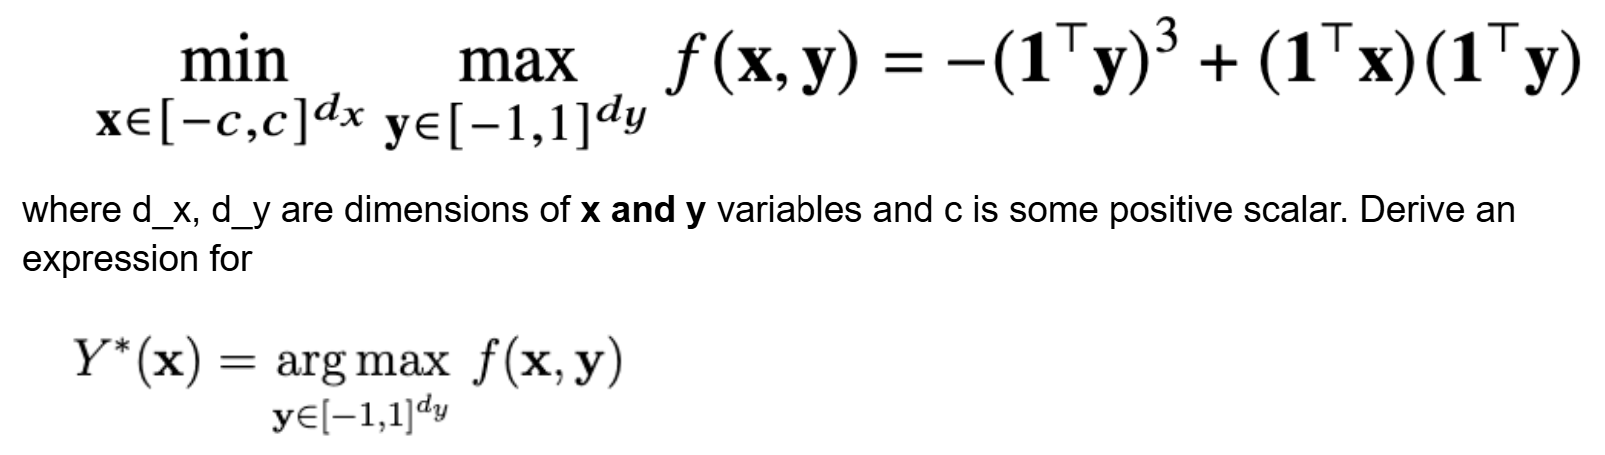


as a function of x. You may report answer in terms of c, d_x, d_y.

# Task 6
Since no correct answer is given, I will simply the attempt I have with the three agent:

https://chatgpt.com/share/690cfb9e-f1ac-8012-af1d-04f1220fbfe4

https://gemini.google.com/share/767c38665cd1

https://claude.ai/share/76e95002-9226-4b2d-998b-0d494a2aee73

# (Advanced) Task 7+: Identify problems where chatbots such as chatgpt.com etc. fail, and suggest their solution with tool calling to develop novel agents.

Many chatbots like ChatGPT are great at answering questions or generating text, but they often fail when dealing with large-scale data or real-world workflows that live on Linux servers. For example, they can’t efficiently process huge datasets, run multi-step analyses, or interact directly with files and scripts on remote systems. These problems can be solved by integrating tool calling—where the chatbot can securely run shell commands, call APIs, or execute Python code—to turn it into a true intelligent agent. Such agents could automate complex data analysis, manage workflows on high-performance clusters, and adaptively interact with real environments, bridging the gap between conversational AI and practical computational work.


# Submit response to: https://forms.gle/AycYgYj4ZZoBZE7m9